In [ ]:
# To donwload guitarset
!wget https://zenodo.org/record/3371780/files/audio_mono-mic.zip
!unzip audio_mono-mic.zip -d guitarset

In [1]:
import processing
import util
import mir_eval
import numpy as np
import os

In [2]:
soundDir = "guitarset/"
annotationDir = soundDir + "Annotations/"
annotationFiles = os.listdir(annotationDir)
solofiles,chordfiles = util.separateFiles(soundDir,"gs")

In [3]:
import importlib
importlib.reload(processing)

<module 'processing' from '/home/srv/Desktop/workspace/sf-harmonicanalysis-onsetdetection/sf-ha-onsetdetection/processing.py'>

Selecting a file, apply onset detection

In [5]:
k = np.random.randint(360)
soundFile = soundDir + annotationFiles[k] + ".wav"
pred,c,f = processing.od(soundFile)

# pred: onset prediction
# c: candidates selected by first spectral flux step. Predictions are subset of candidates
# f: frequency segments that make the candidates selected as onset. {bin: [[score],[start_point,end_point]]}

In [6]:
gt, gtg = util.getOnsets(annotationDir + annotationFiles[k])
# gt: ground truth, gtg: group of merged onsets for each gt

In [13]:
print(soundFile)
mir_eval.onset.evaluate(gt,pred)

guitarset/04_Jazz1-130-D_solo_mic.wav


OrderedDict([('F-measure', 0.4426229508196722),
             ('Precision', 0.38571428571428573),
             ('Recall', 0.5192307692307693)])

Observing the result

In [8]:
from quickPlayer import quickPlayer
from scipy.io.wavfile import read

In [12]:
# press spacebar to start/stop playing. 
# Navigate by clicking on plot, and with 'zoom' and 'pan' features of the toolbar.
# Zoom: Click and drag. Right click to zoom out.

# The player will automatically follow if zoomed. But if zoomed too much, it may cause stuttering.
# Panning while audio is being played will cause stuttering.

fs,x = read(soundFile)
x = x/np.max(np.abs(x))
quickPlayer(soundFile,[x],[gt*fs,pred*fs],["gt","pred"],1,True)

TclError: invalid command name "."

<Figure size 1800x700 with 1 Axes>

In [4]:
soundDir = "musiccritic_cropped/"
annotationDir = soundDir + "Annotations/"
annotationFiles = os.listdir(annotationDir)
solofiles,chordfiles = util.separateFiles(soundDir,"mc")

In [5]:
scores = np.load("results/scores-SFHA-MC.npy",allow_pickle=True)

In [16]:
k = np.random.randint(232)
score = scores[k]
print(score[0])

229_recording-0-2019-03-20T10-24-54-571Z-0


In [17]:
util.play(score,"mc",True) # "True": will also show candidates

TclError: invalid command name "."

<Figure size 1800x700 with 1 Axes>

In [6]:
# we can run onset detection in verbose mode with given onset candidate locations.
tp,tn,fp,fn = util.details(score)


Onset candidate:
onset frame: 115
sf onset number: 1
synthesized sound


STFT around candidate


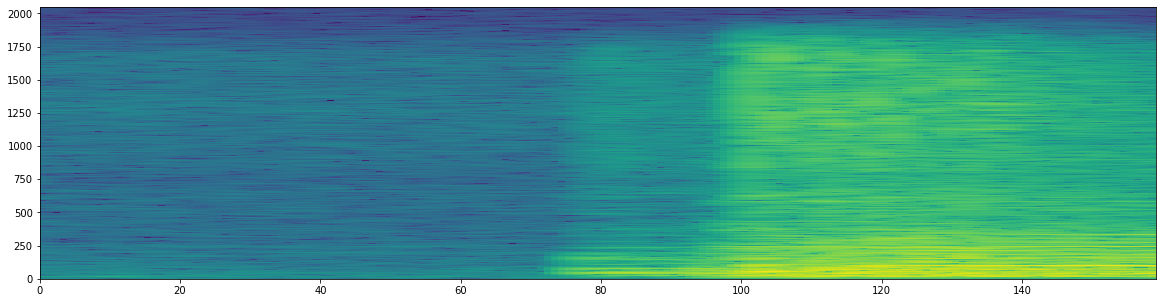

filtered spectral flux


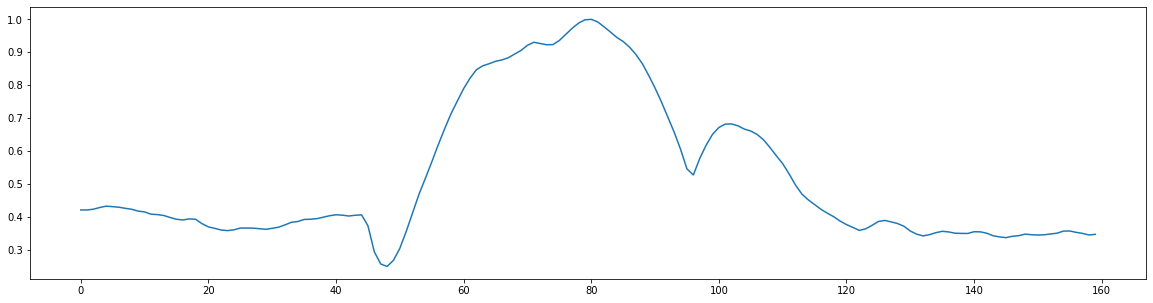

raw spectral flux


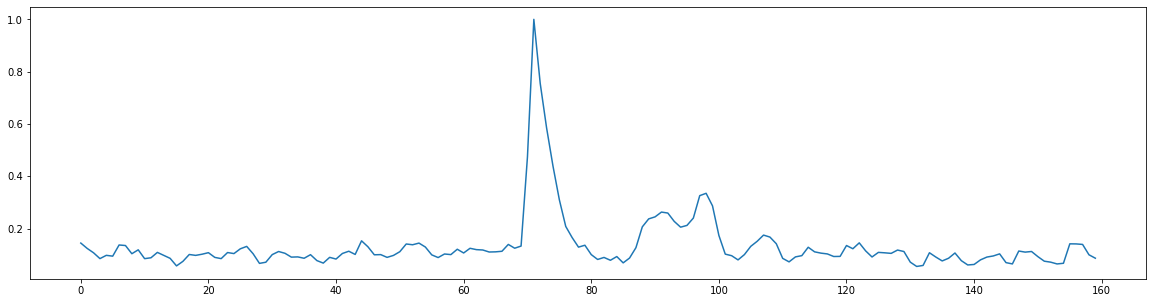

remaining sound after elimination frequencies that do not contribute enough to energy increase for this candidate


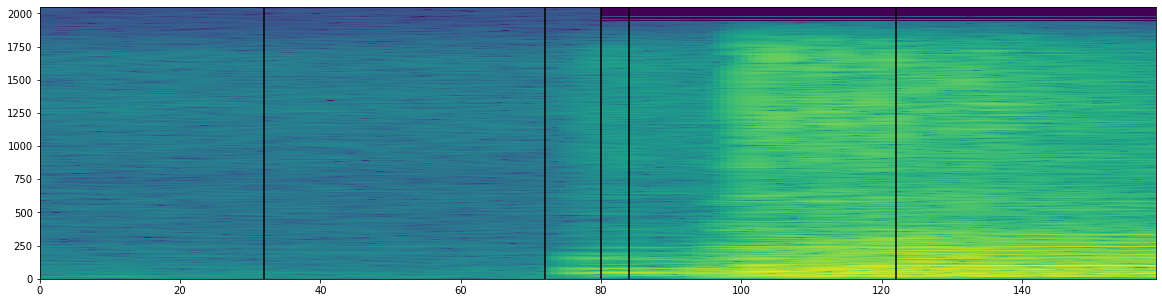

candidate 61 error: 0
candidate 76 error: 0
candidate 101 error: 1
candidate 47 error: 0
candidate 30 error: 0
candidate 7 error: 11
candidate 8 error: 11
candidate 11 error: 1
candidate 15 error: 0
candidate 19 error: 61
Total number of segments: 124


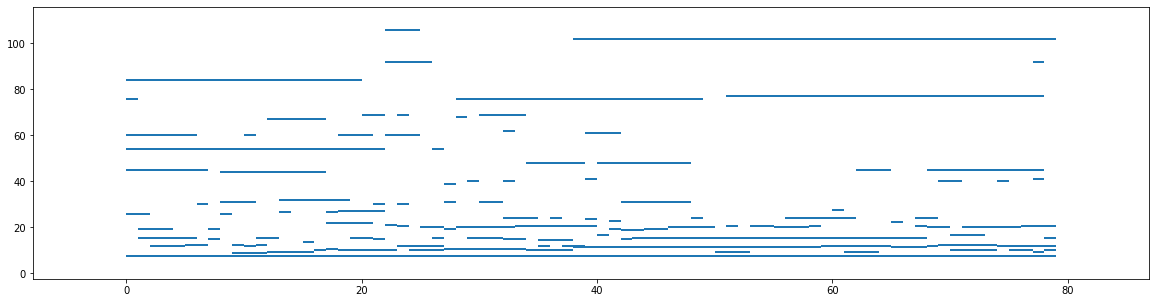

116 due to Length, 0 due to Error, segment skipped
Score for this onset: 1165


(array([0.33378685]),
 array([0.33378685, 1.5354195 , 2.77188209, 3.9938322 , 4.46693878,
        4.61206349, 4.78040816, 5.24190476, 6.43192744, 7.64517007,
        8.06603175, 8.61170068, 8.79455782]),
 [{76.0: [[136.7071089243853, [28, 49]]],
   15.5: [[226.97756071113514, [43, 68]]],
   84.0: [[40.291427711640225, [0, 20]]],
   54.0: [[50.560193012703564, [0, 22]]],
   11.5: [[38.96933506268349, [38, 59]]],
   77.0: [[157.60799851779313, [51, 78]]],
   7.5: [[233.68590469531182, [0, 79]]],
   102.0: [[280.7497705351169, [38, 79]]]}])

In [12]:
_,_,_ = processing.od(soundDir+score[0]+".wav",verbose=score[5][fp],oS=True)